In [2]:
# from env import user, password, host < -- acquire is doing this.
import acquire as acq
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import prepare as prep
import seaborn as sns
import explore as exp
from pydataset import data
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


### Data Acquisition

Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables


In [3]:
df_iris = data('iris')

In [4]:
# You can pull the seaborn version, and it apparently looks nicer??
# But they look the same in VSCode at least if I run this line vs the one above.
df_iris = sns.load_dataset('iris')

In [5]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [6]:
df_iris.shape

(150, 5)

In [7]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# df_iris.describe()
# Can transpose for a nicer view
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5



Read the data from this google sheet into a dataframe, df_google.

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables


In [10]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

In [11]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
df_google.shape

(891, 12)

In [13]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# These are all the objects, but they aren't all categorical.
# df_google.Name.unique(),df_google.Sex.unique(), df_google.Ticket.unique(), df_google.Cabin.unique(), df_google.Embarked.unique()
# For name, they should mostly have a unique name, for Ticket it appears to be their ticket number which should be unique as well, there is over 100 cabin categories but they could be used to identify where in the train they mostlikely were.
df_google.Sex.unique(), df_google.Cabin.unique(), df_google.Embarked.unique()

(array(['male', 'female'], dtype=object),
 array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 

In [17]:
# He made an interesting count for his column uniques, I think I copied something wrong, because instead of numbers it's listing the world. Ah, biggest issue seems to be instead of {col} I had {df_google[col]} so it was pulling up too much.
for col in df_google.columns:
   if df_google[col].dtypes == 'object':
       print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.



Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.


In [18]:
df_excel = pd.read_excel('train.xlsx')

In [19]:
df_excel.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S


In [20]:
df_excel_sample = df_excel.head(100)

In [21]:
len(df_excel)

891

In [22]:
df_excel.columns[0:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [23]:
list(df_excel.select_dtypes(['object']).columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [24]:
value_range = [df_excel.select_dtypes(['float']).max() - df_excel.select_dtypes(['float']).min()]
value_range

[PassengerId    890.0000
 Survived         1.0000
 Pclass           2.0000
 Age             79.5800
 SibSp            8.0000
 Parch            6.0000
 Fare           512.3292
 dtype: float64]

Make a new python module, acquire.py to hold the following data aquisition functions:

- Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

- Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

- Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join all 4 tables together, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

- Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

### Data Preparation

Using the Iris Data:

- Use the function defined in acquire.py to load the iris data.

- Drop the species_id and measurement_id columns.

- Rename the species_name column to just species.

- Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.


In [25]:
iris_df = acq.get_iris_data()

In [26]:
# iris_df = iris_df.drop(columns=['species_id', 'measurement_id', 'Unnamed: 0']).rename(columns={'species_name' : 'species'})
# Can do both at once.

In [27]:
iris_df.head()

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2


In [28]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      150 non-null    int64  
 1   species_id      150 non-null    int64  
 2   species_name    150 non-null    object 
 3   measurement_id  150 non-null    int64  
 4   sepal_length    150 non-null    float64
 5   sepal_width     150 non-null    float64
 6   petal_length    150 non-null    float64
 7   petal_width     150 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 9.5+ KB


In [29]:
iris_df = iris_df.drop(columns=['species_id', 'measurement_id', 'Unnamed: 0'])

In [30]:
iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [31]:
iris_df = iris_df.rename(columns={'species_name' : 'species'})

In [32]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [33]:
dummy_df = pd.get_dummies(iris_df.species, drop_first=True)

In [34]:
iris_df = pd.concat([iris_df,dummy_df], axis=1)

In [35]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [36]:
def prep_iris_data(df):
    '''
    For the Iris DB:
    Drops the Foreign Key Columns, renames 'species_name' to species, 
    then breaks the species into two dummy columns with int values.
    '''
    df = df.drop(columns=['species_id', 'measurement_id', 'Unnamed: 0']).rename(columns={'species_name' : 'species'})
    dummy_df = pd.get_dummies(df.species, drop_first=True)
    df = pd.concat([df,dummy_df], axis=1)
    return df

In [37]:
# iris_df = prep.prep_iris_data(iris_df)

In [38]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


Using the Titanic dataset:

- Use the function defined in acquire.py to load the Titanic data.

- Drop any unnecessary, unhelpful, or duplicated columns.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [39]:
titanic_df = acq.get_titanic_data()

In [40]:
titanic_df = titanic_df.drop_duplicates().drop(columns=['passenger_id', 'Unnamed: 0', 'age', 'class', 'embarked']).rename(columns={'pclass' : 'cabin_class', 'embark_town' : 'embarked'}) # I want to drop fare, but I'm not sure what the data is being used for, so Fare might be needed, if it's not about surviving.
titanic_df['family'] = titanic_df.sibsp + titanic_df.parch
titanic_df = titanic_df.drop(columns=["parch", "sibsp"])
titanic_df.deck.fillna("None", inplace=True)
titanic_df.embarked.fillna("", inplace=True)
titanic_df.index.names=["passenger_id"] # I doublechecked, passenger_id does share the same values as the index.



In [41]:
dummy_df = pd.get_dummies(["titanic_df.passenger_class", 'titanic_df.sex', 'titanic_df.embarked'], drop_first=True)

In [42]:
dummy_df.T

,0,1,2
titanic_df.passenger_class,1,0,0
titanic_df.sex,0,1,0


In [43]:
titanic_df.head()

,survived,cabin_class,sex,fare,deck,embarked,alone,family
passenger_id,,,,,,,,
0,0,3,male,7.2500,None,Southampton,0,1
1,1,1,female,71.2833,C,Cherbourg,0,1
2,1,3,female,7.9250,None,Southampton,1,0
3,1,1,female,53.1000,C,Southampton,0,1
4,0,3,male,8.0500,None,Southampton,1,0


In [44]:
titanic_df.describe()

,survived,cabin_class,fare,alone,family
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,32.204208,0.602694,0.904602
std,0.486592,0.836071,49.693429,0.489615,1.613459
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,14.454200,1.000000,0.000000
75%,1.000000,3.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,512.329200,1.000000,10.000000


Using the Telco dataset:

- Use the function defined in acquire.py to load the Telco data.

- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [45]:
telco = acq.get_telco_data()

In [46]:
telco.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
internet_service_type_id,1,1,2,2,2
payment_type_id,2,2,1,1,2
contract_type_id,2,1,1,1,1
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3


In [47]:
telco = telco.drop_duplicates().drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
telco.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,churn_month
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL,NaN
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL,NaN
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic,2022-01-31
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic,2022-01-31
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic,2022-01-31


In [48]:
telco['gender_map'] = telco.gender.map({'Female' : 1, 'Male' : 0})
telco['partner_map'] = telco.partner.map({'Yes' : 1, 'No' : 0})
telco['dependents_map'] = telco.dependents.map({'Yes' : 1, 'No' : 0})
telco['phone_service_map'] = telco.phone_service.map({'Yes' : 1, 'No' : 0})
telco['paperless_billing_map'] = telco.paperless_billing.map({'Yes' : 1, 'No' : 0})
telco['churn_map'] = telco.churn.map({'Yes' : 1, 'No' : 0})
telco.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,contract_type,payment_type,internet_service_type,churn_month,gender_map,partner_map,dependents_map,phone_service_map,paperless_billing_map,churn_map
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,One year,Mailed check,DSL,NaN,1,1,1,1,1,0
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,Month-to-month,Mailed check,DSL,NaN,0,0,0,1,0,0
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,Month-to-month,Electronic check,Fiber optic,2022-01-31,0,0,0,1,1,1
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,Month-to-month,Electronic check,Fiber optic,2022-01-31,0,1,0,1,1,1
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,Month-to-month,Mailed check,Fiber optic,2022-01-31,1,1,0,1,1,1


In [49]:
dummy_df = pd.get_dummies(telco[['multiple_lines', 'online_security', 'online_backup', 'streaming_tv', 'streaming_movies', 'device_protection', 'tech_support', 'contract_type', 'internet_service_type', 'payment_type']], drop_first=True)
dummy_df

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,...,device_protection_Yes,tech_support_No internet service,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
7039,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
7040,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7041,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1


In [50]:
telco = pd.concat([telco, dummy_df], axis=1)
telco.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,device_protection_Yes,tech_support_No internet service,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,0,0,1,1,0,0,0,0,0,1
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,0,0,0,0,0,0,0,0,0,1
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,1,0,0,0,0,1,0,0,1,0
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,1,0,0,0,0,1,0,0,1,0
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,0,0,1,0,0,1,0,0,0,1


Split your data:

- Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.
- Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.
- Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.
- Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [51]:
def data_split(df, target):
    '''
    take in a DataFrame and target.
    return train, validate, test DataFrames.
    '''
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train[target])
    
    return train, validate, test

Iris Dataset:

In [52]:
train_iris, validate_iris, test_iris = prep.data_split(iris_df, 'species')

In [53]:
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
70,versicolor,5.9,3.2,4.8,1.8,1,0
123,virginica,6.3,2.7,4.9,1.8,0,1
87,versicolor,6.3,2.3,4.4,1.3,1,0
3,setosa,4.6,3.1,1.5,0.2,0,0
15,setosa,5.7,4.4,1.5,0.4,0,0


In [54]:
train_iris.shape, validate_iris.shape, test_iris.shape

((90, 7), (30, 7), (30, 7))

Titanic Dataset:

In [55]:
train_titanic, validate_titanic, test_titanic = prep.data_split(titanic_df, 'survived')

In [56]:
train_titanic.head()

,survived,cabin_class,sex,fare,deck,embarked,alone,family
passenger_id,,,,,,,,
455,1,3,male,7.8958,None,Cherbourg,1,0
380,1,1,female,227.5250,None,Cherbourg,1,0
492,0,1,male,30.5000,C,Southampton,1,0
55,1,1,male,35.5000,C,Southampton,1,0
243,0,3,male,7.1250,None,Southampton,1,0


In [57]:
train_titanic.shape, validate_titanic.shape, test_titanic.shape

((534, 8), (178, 8), (179, 8))

In [58]:
titanic_df[titanic_df.family > 7]

,survived,cabin_class,sex,fare,deck,embarked,alone,family
passenger_id,,,,,,,,
159,0,3,male,69.55,None,Southampton,0,10
180,0,3,female,69.55,None,Southampton,0,10
201,0,3,male,69.55,None,Southampton,0,10
324,0,3,male,69.55,None,Southampton,0,10
792,0,3,female,69.55,None,Southampton,0,10
846,0,3,male,69.55,None,Southampton,0,10
863,0,3,female,69.55,None,Southampton,0,10


Telco Dataset:

In [59]:
train_telco, validate_telco, test_telco = prep.data_split(telco, 'churn')

In [60]:
train_telco.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,device_protection_Yes,tech_support_No internet service,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,...,0,0,0,1,0,0,0,0,0,0
2479,2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,...,0,1,0,1,0,0,1,0,1,0
5889,5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,...,1,0,0,0,0,0,0,0,0,1
6087,6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,...,0,0,1,0,1,0,0,0,0,0
785,785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,...,0,0,0,1,0,1,0,1,0,0


In [61]:
train_telco.shape, validate_telco.shape, test_telco.shape

((4225, 50), (1409, 50), (1409, 50))

### Tidy Data

##### Attendance Data

- Read the data from the attendance table and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:

In [62]:
# name
# Billy    0.5250
# Jane     0.6875
# John     0.9125
# Sally    0.7625
# Name: grade, dtype: float64

In [63]:
students = pd.read_csv('untidy-data/attendance.csv')
students.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [64]:
students = students.rename(columns={'Unnamed: 0' : 'name'})
students.head()

,name,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [65]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        4 non-null      object
 1   2018-01-01  4 non-null      object
 2   2018-01-02  4 non-null      object
 3   2018-01-03  4 non-null      object
 4   2018-01-04  4 non-null      object
 5   2018-01-05  4 non-null      object
 6   2018-01-06  4 non-null      object
 7   2018-01-07  4 non-null      object
 8   2018-01-08  4 non-null      object
dtypes: object(9)
memory usage: 416.0+ bytes


In [66]:
# Melting is very interesting.
students = students.melt(id_vars='name', var_name='date', value_name='attend')
students.head()
# Only run this once or you'll have columns full of "date", first date then attend for each run


,name,date,attend
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [67]:
# Changing the attend letter code into floats we can work with. P (present) is full credit so 1, an A (absence) is worth nothing so 0, 10 T (tardy) equals an absence so .9, and H is a half day so .5
students.attend = students.attend.map({'P':1, 'H':.5, 'A':0, 'T': .9})
students.head()

,name,date,attend
0,Sally,2018-01-01,1.0
1,Jane,2018-01-01,0.0
2,Billy,2018-01-01,0.0
3,John,2018-01-01,1.0
4,Sally,2018-01-02,0.9


In [68]:
# Groupby use!
students.groupby('name').mean()

,attend
name,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


##### Coffee Levels

- Read the coffee_levels table.
- Transform the data so that each carafe is in it's own column.
- Is this the best shape for the data?


In [69]:
coffee = pd.read_csv('untidy-data/coffee_levels.csv')
coffee.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [70]:
# pivot is really interesting, very useful. Index is the item we want to preserve. columns is which we want to break the other values down into, so we get amount of coffee per coffee carafe, for each hour!
coffee = coffee.pivot(index='hour', columns='coffee_carafe')
coffee

coffee_amount                    
coffee_carafe             x         y         z
hour                                           
8                  0.816164  0.189297  0.999264
9                  0.451018  0.521502  0.915990
10                 0.843279  0.023163  0.144928
11                 0.335533  0.235529  0.311495
12                 0.898291  0.017009  0.771947
13                 0.310711  0.997464  0.398520
14                 0.507288  0.058361  0.864464
15                 0.215043  0.144644  0.436364
16                 0.183891  0.544676  0.280621
17                 0.391560  0.594126  0.436677

In [71]:
# The above is easier to view in a small space for this set of data.
# I personally like this form for the data, but I know a lot of people would rather have more rows than columns.
coffee.T

hour                               8         9         10        11        12  \
              coffee_carafe                                                     
coffee_amount x              0.816164  0.451018  0.843279  0.335533  0.898291   
              y              0.189297  0.521502  0.023163  0.235529  0.017009   
              z              0.999264  0.915990  0.144928  0.311495  0.771947   

hour                               13        14        15        16        17  
              coffee_carafe                                                    
coffee_amount x              0.310711  0.507288  0.215043  0.183891  0.391560  
              y              0.997464  0.058361  0.144644  0.544676  0.594126  
              z              0.398520  0.864464  0.436364  0.280621  0.436677

##### Cake Recipes

- Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
- Tidy the data as necessary.
- Which recipe, on average, is the best? recipe b
- Which oven temperature, on average, produces the best results? 275
- Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees


In [72]:
# B..but the cake is a lie? or is that the lie?
cake = pd.read_csv('untidy-data/cake_recipes.csv')
cake


,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [73]:
# MELT the butter, for a fluffy cake.
# Mixing the temp and score by the recipe:position!
cake = cake.melt(id_vars='recipe:position', var_name='temp', value_name='score')
cake.head()

,recipe:position,temp,score
0,a:bottom,225,61.738655
1,a:top,225,51.709751
2,b:bottom,225,57.095320
3,b:top,225,82.455004
4,c:bottom,225,96.470207


In [74]:
cake[['recipe','position']] = cake['recipe:position'].str.split(':', expand=True)
cake.head()

,recipe:position,temp,score,recipe,position
0,a:bottom,225,61.738655,a,bottom
1,a:top,225,51.709751,a,top
2,b:bottom,225,57.095320,b,bottom
3,b:top,225,82.455004,b,top
4,c:bottom,225,96.470207,c,bottom


In [75]:
cake = cake.drop(columns='recipe:position')
cake.head()

,temp,score,recipe,position
0,225,61.738655,a,bottom
1,225,51.709751,a,top
2,225,57.095320,b,bottom
3,225,82.455004,b,top
4,225,96.470207,c,bottom


In [76]:
cake.groupby('recipe').mean() == cake.groupby('recipe').mean().max()
# according to this recipe B has the highest average score!


,score
recipe,
a,False
b,True
c,False
d,False


In [77]:
# teacher made this prettier with:
cake.groupby('recipe').mean().idxmax(), cake.groupby('recipe').mean().max()

(score    b
 dtype: object,
 score    76.736074
 dtype: float64)

In [78]:
# idxmax() is so very amazing.

In [79]:
cake.groupby('temp').mean().idxmax()

score    275
dtype: object

In [80]:
# These exercises are really just "Fun with Groupby"!
cake.groupby(['recipe', 'position', 'temp']).mean().idxmax(), cake.groupby(['recipe', 'position', 'temp']).mean().max()

(score    (b, bottom, 300)
 dtype: object,
 score    99.248541
 dtype: float64)

Bonus: explore the other tables in the tidy_data database and reshape them as necessary so that they are in a tidy format.

In [81]:
# Coming back to this later! (I hope.)

### Exploratory Data Analysis

#### Correlated: For Numerical Values
#### Related: For String values

ex: passenger class and survival have a relation (are related), not a correlation (not correlated).

#### Part 1

##### iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.


In [82]:
iris = acq.get_iris_data()

In [83]:
iris.head()

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2


In [84]:
iris = prep.prep_iris_data(iris)
train_iris, validate_iris, test_iris = prep.data_split(iris, 'species')

In [85]:
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
70,versicolor,5.9,3.2,4.8,1.8,1,0
123,virginica,6.3,2.7,4.9,1.8,0,1
87,versicolor,6.3,2.3,4.4,1.3,1,0
3,setosa,4.6,3.1,1.5,0.2,0,0
15,setosa,5.7,4.4,1.5,0.4,0,0


In [86]:
train_iris.shape, validate_iris.shape, test_iris.shape

((90, 7), (30, 7), (30, 7))


2. Univariate Stats

    - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

    - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

    - Document takeaways & any actions.


In [87]:
train_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,5.875556,3.070000,3.782222,1.203333,0.333333,0.333333
std,0.792282,0.436135,1.742114,0.755422,0.474045,0.474045
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000
25%,5.225000,2.800000,1.600000,0.400000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000
75%,6.400000,3.375000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


In [88]:
num_type, cat_type = exp.dtypes_to_list(train_iris)

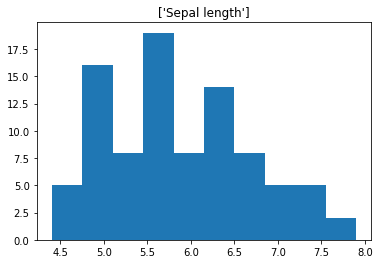

In [95]:
plt.hist(train_iris[num_type[0]])
plt.title([num_type[0].replace('_', ' ').capitalize()])
plt.show()

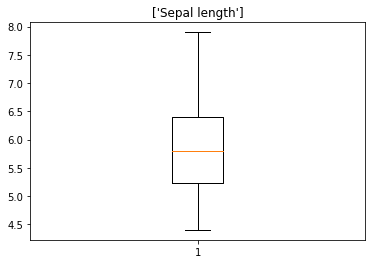

In [96]:
plt.boxplot(train_iris[num_type[0]])
plt.title([num_type[0].replace('_', ' ').capitalize()])
plt.show()

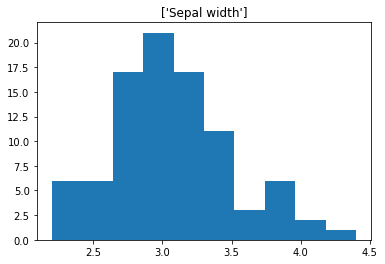

In [98]:
plt.hist(train_iris[num_type[1]])
plt.title([num_type[1].replace('_', ' ').capitalize()])
plt.show()

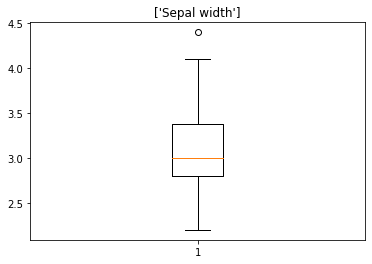

In [97]:
plt.boxplot(train_iris[num_type[1]])
plt.title([num_type[1].replace('_', ' ').capitalize()])
plt.show()

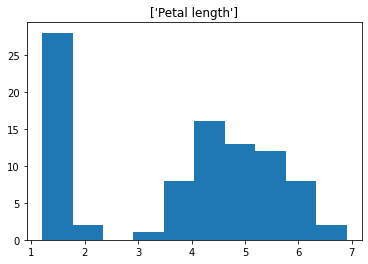

In [100]:
plt.hist(train_iris[num_type[2]])
plt.title([num_type[2].replace('_', ' ').capitalize()])
plt.show()

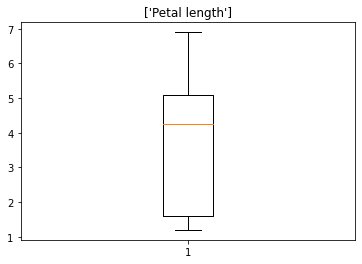

In [99]:
plt.boxplot(train_iris[num_type[2]])
plt.title([num_type[2].replace('_', ' ').capitalize()])
plt.show()

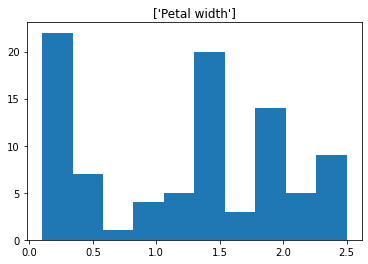

In [102]:
plt.hist(train_iris[num_type[3]])
plt.title([num_type[3].replace('_', ' ').capitalize()])
plt.show()

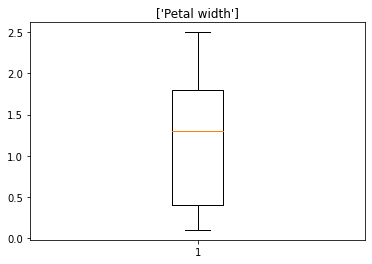

In [101]:
plt.boxplot(train_iris[num_type[3]])
plt.title([num_type[3].replace('_', ' ').capitalize()])
plt.show()

In [ ]:
train_iris[num_type].cov()
# co-variance

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.627710,-0.052539,1.198549,0.490419
sepal_width,-0.052539,0.190213,-0.357169,-0.132146
petal_length,1.198549,-0.357169,3.034961,1.261633
petal_width,0.490419,-0.132146,1.261633,0.570663


In [ ]:
train_iris[num_type].corr()
# correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.152049,0.868360,0.819404
sepal_width,-0.152049,1.000000,-0.470085,-0.401092
petal_length,0.868360,-0.470085,1.000000,0.958664
petal_width,0.819404,-0.401092,0.958664,1.000000


In [ ]:
alf = 0.05

In [ ]:
# H0 : There is no relation between Sepal Length, and Petal Length.
# Ha : There is a relationship between Sepal Length and Petal Length in Irises.

In [ ]:
observed = pd.crosstab(train_iris.sepal_length, train_iris.petal_length)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
---
Expected

[[0.02222222 0.04444444 0.05555556 ... 0.01111111 0.01111111 0.01111111]
 [0.02222222 0.04444444 0.05555556 ... 0.01111111 0.01111111 0.01111111]
 [0.04444444 0.08888889 0.11111111 ... 0.02222222 0.02222222 0.02222222]
 ...
 [0.02222222 0.04444444 0.05555556 ... 0.01111111 0.01111111 0.01111111]
 [0.02222222 0.04444444 0.05555556 ... 0.01111111 0.01111111 0.01111111]
 [0.02222222 0.04444444 0.05555556 ... 0.01111111 0.01111111 0.01111111]]
---

chi^2 = 1190.3189
p     = 0.0021


In [ ]:
if p < alf:
    print("We fail to accept no association between Iris Sepal Length and Iris Petal Length. We reject the Null Hypothesis")
else:
    print("We cannot reject the Null Hypothesis. There appears to be no relationship between Iris Sepal Length and Irish Petal Length.")

We fail to accept no association between Iris Sepal Length and Iris Petal Length. We reject the Null Hypothesis


#### Takeaways:
* We observe some indication that a species of Iris may have some significantly shorter petals as well as some significantly thinner petals, perhaps the same species?
* We cannot rule out an association between Sepal Length and Petal Length, I decided to check this since we seem to be preoccupied with Petal matching Petal and Sepal matching Sepal, I wanted to see if perhaps there was an association between Sepal and Petal, resulting in a larger or smaller flower as a whole.


3. Bivariate Stats

    - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

    - For each measurement type, compute the descriptive statistics for each species.

    - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

    - Document takeaways & any actions.


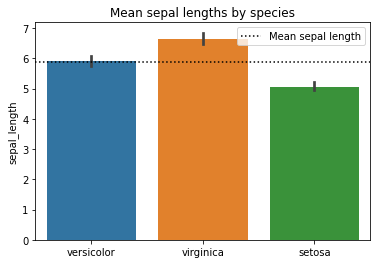

In [107]:
plt.title("Mean sepal lengths by species")
sns.barplot(x="species", y="sepal_length", data=train_iris)
mean_sepal_length = train_iris.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean sepal length", color='black', linestyle='dotted')
# Teacher added this to remove Species at the bottom, very nifty.
plt.xlabel('')
plt.legend()
plt.show()

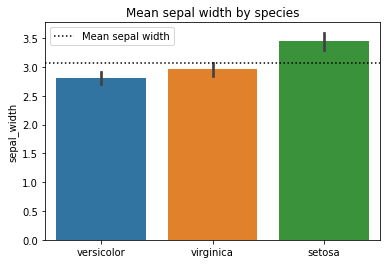

In [106]:
plt.title("Mean sepal width by species")
sns.barplot(x="species", y="sepal_width", data=train_iris)
mean_sepal_width = train_iris.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean sepal width", color='black', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

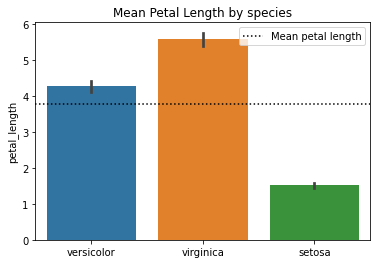

In [110]:
plt.title("Mean Petal Length by species")
sns.barplot(x="species", y="petal_length", data=train_iris)
mean_petal_length = train_iris.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='black', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

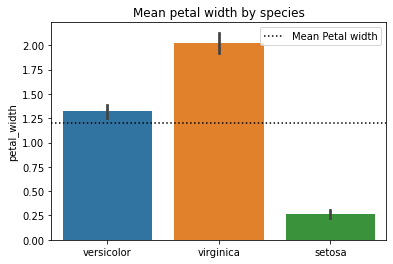

In [111]:
plt.title("Mean petal width by species")
sns.barplot(x="species", y="petal_width", data=train_iris)
mean_petal_width = train_iris.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean Petal width", color='black', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

In [114]:
train_iris[train_iris.species == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.00000,30.000000,30.000000,30.000000,30.0,30.0
mean,5.91000,2.806667,4.273333,1.320000,1.0,0.0
std,0.47659,0.281539,0.409317,0.193694,0.0,0.0
min,4.90000,2.300000,3.300000,1.000000,1.0,0.0
25%,5.60000,2.625000,4.000000,1.200000,1.0,0.0
50%,5.80000,2.800000,4.250000,1.300000,1.0,0.0
75%,6.17500,3.000000,4.575000,1.475000,1.0,0.0
max,7.00000,3.400000,5.100000,1.800000,1.0,0.0


In [113]:
train_iris[train_iris.species == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,6.646667,2.956667,5.563333,2.023333,0.0,1.0
std,0.533520,0.309263,0.492344,0.286095,0.0,0.0
min,5.800000,2.200000,4.800000,1.500000,0.0,1.0
25%,6.300000,2.800000,5.125000,1.800000,0.0,1.0
50%,6.500000,3.000000,5.550000,2.000000,0.0,1.0
75%,6.900000,3.100000,5.800000,2.300000,0.0,1.0
max,7.900000,3.800000,6.900000,2.500000,0.0,1.0


In [112]:
train_iris[train_iris.species == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,5.070000,3.446667,1.510000,0.266667,0.0,0.0
std,0.356371,0.420782,0.178789,0.121296,0.0,0.0
min,4.400000,2.300000,1.200000,0.100000,0.0,0.0
25%,4.825000,3.200000,1.400000,0.200000,0.0,0.0
50%,5.000000,3.400000,1.500000,0.200000,0.0,0.0
75%,5.375000,3.775000,1.600000,0.375000,0.0,0.0
max,5.800000,4.400000,1.900000,0.600000,0.0,0.0


In [116]:
alf = 0.05

In [117]:
# HO: Virginica Petals are on average lower or equal to Versicolor Petals.
# Ha: Virginica Petals are on average significantly larger than Versicolor Petals.

In [118]:
# Teacher set shorter variables for longer references, let's do that!
virginica = train_iris[train_iris.species == 'virginica']
versicolor = train_iris[train_iris.species == 'versicolor']
setosa = train_iris[train_iris.species == 'setosa']
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="greater")
if p< alf:
    print("We can reject the null hypothesis. Virginica petals are on average significantly wider than versicolors.")
else:
    print("We fail to reject the Null Hypothesis, virginica petals are on average equal to or smaller than versicolor petals.")

We can reject the null hypothesis. Virginica petals are on average significantly wider than versicolors.


#### Takeaways:
* Virginica appear to hae the largest petals. While Setosa seem to have the smallest with stout sepals as well.


4. Multivariate Stats

    - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

    - Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

    - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

    - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

    - Document takeaways and any actions.

#### Part II
##### Explore your titanic dataset more completely.

- Determine drivers of the target variable

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [ ]:
titanic = acq.get_titanic_data()
titanic = prep.prep_titanic(titanic)
train_titanic, validate_titanic, test_titanic = prep.data_split(titanic, 'survived')

#### Part III
- Explore your telco data to discover drivers of churn

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [ ]:
telco = acq.get_telco_data()
telco = prep.prep_telco(telco)
telco = telco.drop(columns=['Unnamed: 0']) # This guy keeps popping up, he can't be removed in the def it seems.
telco = telco[telco.total_charges != ' ']
telco['total_charges'] = telco.total_charges.astype(float) # I hate you float, it won't let me fix this in the def either.
train_telco, validate_telco, test_telco = prep.data_split(telco, 'churn')
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
telco.total_charges.info()

<class 'pandas.core.series.Series'>
Int64Index: 7032 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


In [ ]:
train_telco.shape, validate_telco.shape, test_telco.shape

((4218, 49), (1407, 49), (1407, 49))

In [ ]:
# I'm actually curious if seniors are more or less likely to Churn.
# H0 : There's no difference between senior and non-senior Churn rate.
# Ha : There's noteable difference between senior and non-senior Churn rate.

##### Univariate:

In [ ]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
gender_encoded,7032.0,0.495307,0.500014,0.00,0.0000,0.000,1.0000,1.00
partner_encoded,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
dependents_encoded,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
phone_service_encoded,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
paperless_billing_encoded,7032.0,0.592719,0.491363,0.00,0.0000,1.000,1.0000,1.00
churn_encoded,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [ ]:
telco.gender.value_counts(), telco.senior_citizen.value_counts(), telco.partner.value_counts(), telco.partner[telco.senior_citizen == 1].value_counts(), telco.dependents.value_counts(), telco.dependents[telco.senior_citizen == 1].value_counts(), telco.tenure.mean(), telco.tenure[telco.tenure > 32].count(), telco.phone_service.value_counts(), telco.payment_type.value_counts(), telco.contract_type.value_counts(), telco.churn.value_counts(), telco.churn[telco.tenure > 32].value_counts(), telco.churn[telco.tenure < 32].value_counts()

(Male      3549
 Female    3483
 Name: gender, dtype: int64,
 0    5890
 1    1142
 Name: senior_citizen, dtype: int64,
 No     3639
 Yes    3393
 Name: partner, dtype: int64,
 Yes    573
 No     569
 Name: partner, dtype: int64,
 No     4933
 Yes    2099
 Name: dependents, dtype: int64,
 No     1051
 Yes      91
 Name: dependents, dtype: int64,
 32.421786120591584,
 3268,
 Yes    6352
 No      680
 Name: phone_service, dtype: int64,
 Electronic check             2365
 Mailed check                 1604
 Bank transfer (automatic)    1542
 Credit card (automatic)      1521
 Name: payment_type, dtype: int64,
 Month-to-month    3875
 Two year          1685
 One year          1472
 Name: contract_type, dtype: int64,
 No     5163
 Yes    1869
 Name: churn, dtype: int64,
 No     2859
 Yes     409
 Name: churn, dtype: int64,
 No     2254
 Yes    1441
 Name: churn, dtype: int64)

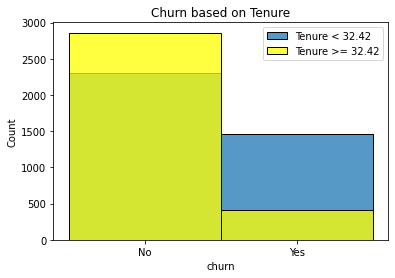

In [ ]:
tel_hist1 = sns.histplot(telco.churn[telco.tenure < telco.tenure.mean()], label=f"Tenure < {round(telco.tenure.mean(), 2)}" )
tel_hist2 = sns.histplot(telco.churn[telco.tenure >= telco.tenure.mean()], color='yellow', label=f"Tenure >= {round(telco.tenure.mean(), 2)}")
plt.legend()
plt.title("Churn based on Tenure")
plt.show()


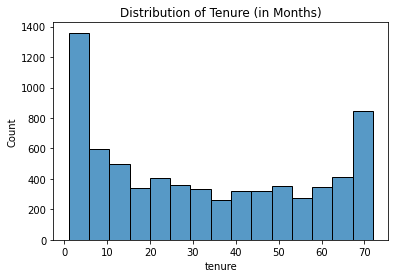

In [ ]:
sns.histplot(telco.tenure)
plt.title("Distribution of Tenure (in Months)")
plt.show()

##### Bivariate Stats:

In [ ]:
tel = train_telco # I just want a shorter var, and so I'll only look at the correct data set.
tel.head().T

,3727,4271,6317,489,3771
customer_id,5242-UOWHD,6016-LVTJQ,8944-AILEF,0719-SYFRB,5309-TAIKL
gender,Male,Female,Male,Female,Female
senior_citizen,0,0,0,0,0
partner,Yes,Yes,Yes,No,No
dependents,Yes,Yes,No,No,No
tenure,45,34,15,12,7
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,No,No,Yes,No
online_security,No internet service,No internet service,No internet service,Yes,No
online_backup,No internet service,No internet service,No internet service,No,No


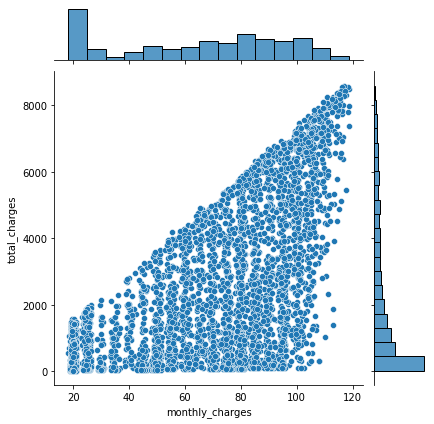

In [ ]:
sns.jointplot(data=tel, x='monthly_charges', y='total_charges')

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

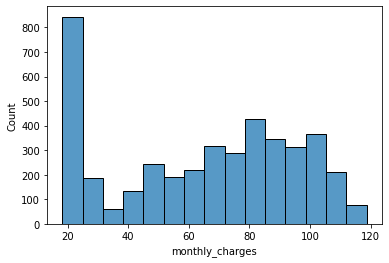

In [ ]:
sns.histplot(tel.monthly_charges)

In [ ]:
#Scatterplot heatmap is very interesting sns feature to look into.
#Chi2 p-values with square heatmap
# Does your data tell you the same thing? drop one of the columns

In [ ]:
x_train = train_telco.drop(columns=['churn'])
y_train = train_telco.churn_encoded